In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

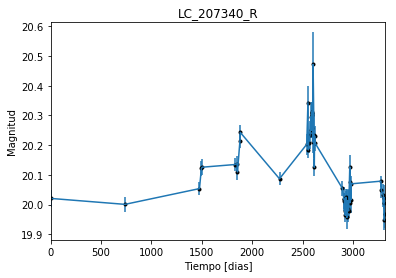

In [2]:
data = np.genfromtxt('LC_207340_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_207340_R')
plt.savefig("LC_207340_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

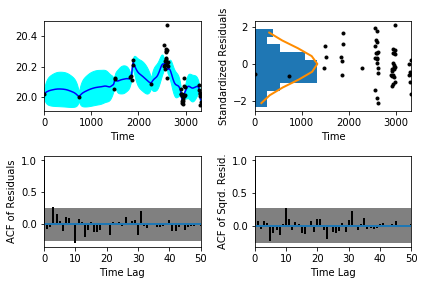

In [5]:
sample.assess_fit()

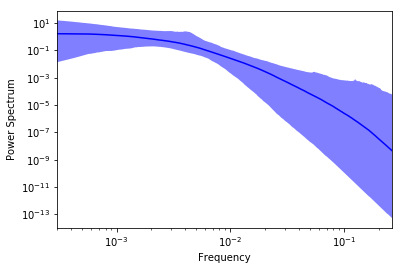

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

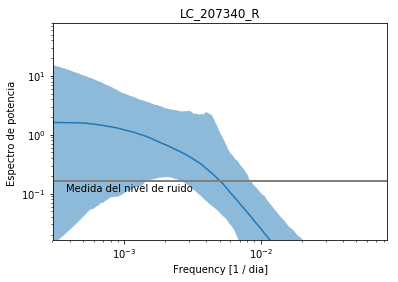

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_207340_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_207340_R')

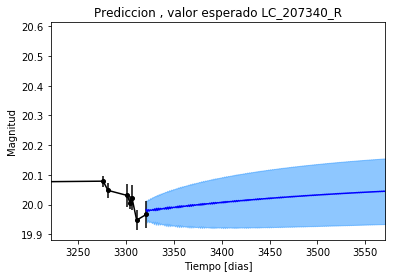

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_207340_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_207340_R')

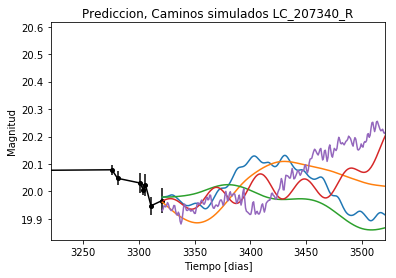

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_207340_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


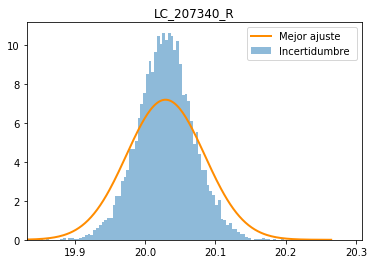

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_207340_R')
plt.savefig("Mejor_ajuste_LC_207340_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_207340_R')

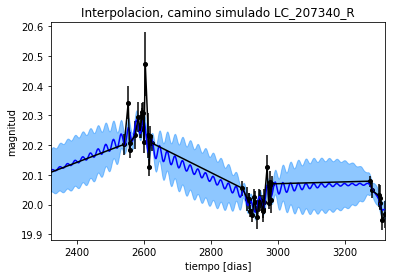

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_207340_R')

Text(0.5,1,'Interpolacion, camino simulado LC_207340_R')

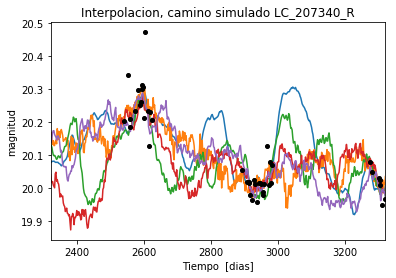

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_207340_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 355.380068443
Median: 0.00865216740621
Standard deviation: 0.100700001609
68% credibility interval: [ 0.00108518  0.09910422]
95% credibility interval: [  3.68490937e-04   4.04727492e-01]
99% credibility interval: [  3.16947511e-04   5.01034022e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 243.382506818
Median: 0.00407999140175
Standard deviation: 0.0585763048519
68% credibility interval: [ 0.00081904  0.03213599]
95% credibility interval: [ 0.00035444  0.2034934 ]
99% credibility interval: [  3.10720958e-04   4.11734445e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 685.758896324
Median: 0.026088332467
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 981.234123115
Median: 105.300263104
Standard deviation: 1.7225046495
68% credibility interval: [ 103.36772068  106.53995288]
95% credibility interval: [ 100.70321829  107.27508044]
99% credibility interval: [  98.66804256  107.72040489]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 654.497032693
Median: 0.479226518557
Standard deviation: 1.24959975144
68% credibility interval: [ 0.07795526  2.3476259 ]
95% credibility interval: [ 0.01809479  4.36707949]
99% credibility interval: [ 0.01237368  5.80117198]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 334.828601598
Median: 0.408392836705
Standard deviation: 2.78630487125
68% credibility interval: [ 0.02141842  3.49095534]
95% credibility interval: [  2.56166548e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 325.567695763
Median: 4.24304198106e-40
Standard deviation: 9.42126307848e+95
68% credibility interval: [  7.00497505e-90   3.98873165e-01]
95% credibility interval: [  9.13377127e-159   1.49990616e+088]
99% credibility interval: [  6.91308465e-165   3.45351606e+096]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1934.20269291
Median: 20.0887177277
Standard deviation: 0.0413719168463
68% credibility interval: [ 20.05188445  20.12100703]
95% credibility interval: [ 19.99212679  20.16482199]
99% credibility interval: [ 19.94595497  20.20483135]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 659.767971135
Median: 0.0294609611312
Standard deviation: 0.134451614252
68% credibility interval: [ 0.          0.22871055]
95% credibility interval: [ 0.          0.47004342]
99% credibility interval: [ 0.          0.51439759]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 659.767971135
Median: 0.0294609611312
Standard deviation: 0.134451614252
68% credibility interval: [ 0.          0.22871055]
95% credibility interval: [ 0.          0.47004342]
99% credibility interval: [ 0.          0.51439759]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 499.192852489
Median: 0.0
Standard deviation: 0.00144848787636
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 981.234123115
Median: 105.300263104
Standard deviation: 1.7225046495
68% credibility interval: [ 103.36772068  106.53995288]
95% credibility interval: [ 100.70321829  107.27508044]
99% credibility interval: [  98.66804256  107.72040489]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1680.91700982
Median: 0.00978648255959
Standard deviation: 0.00917954043817
68% credibility interval: [ 0.00603133  0.0179796 ]
95% credibility interval: [ 0.00410936  0.03551936]
99% credibility interval: [ 0.00323269  0.05421202]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1342.51372215
Median: 1.17209177412
Standard deviation: 0.191682934764
68% credibility interval: [ 0.99647482  1.36834894]
95% credibility interval: [ 0.85147039  1.60613568]
99% credibility interval: [ 0.76394355  1.80528952]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 558.01364939
Median: 0.000226191776161
Standard deviation: 0.0211100694802
68% credibility interval: [  1.29375919e-06   5.68461150e-03]
95% credibility interval: [  2.43399634e-92   5.61815281e-02]
99% credibility interval: [  9.09289693e-100   1.31168842e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 355.380068443
Median: (-0.0543631711219-0.553783896206j)
Standard deviation: 1.05545781837
68% credibility interval: [-0.62269016-2.27817065j -0.00681841-1.70006218j]
95% credibility interval: [ -2.54297783e+00+0.j          -2.31529684e-03-0.42767527j]
99% credibility interval: [ -3.14808960e+00+0.j          -1.99143995e-03-2.86231816j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 243.382506818
Median: (-0.0256353420289+0.342116415016j)
Standard deviation: 0.921476201179
68% credibility interval: [-0.20191635+0.97815407j -0.00514617+0.02790477j]
95% credibility interval: [-1.27858675+0.j         -0.00222702+0.36307305j]
99% credibility interval: [ -2.58700381e+00+1.99463551j  -1.95231736e-03+0.j        ]
Posterior s